# Polynomial Regression (Coklu Regresyon)

# Overfiting - Underfiting

Polinom Regresyon , bağımsız değişkenler ile bağımlı değişkenler arasındaki ilişkinin n'inci derece    polinomda modellendiği bir regresyon analizi şeklidir.                     
Types of polinomials                            
1st degree ---> linear    b1x + b0                              
2nd degree ---> Quadratic b2x**2 + b1x + b0 2.derece                         
3rd degree ---> Cubic     b3x**3 + b2x**2 + b1x + b0 3.derece                   

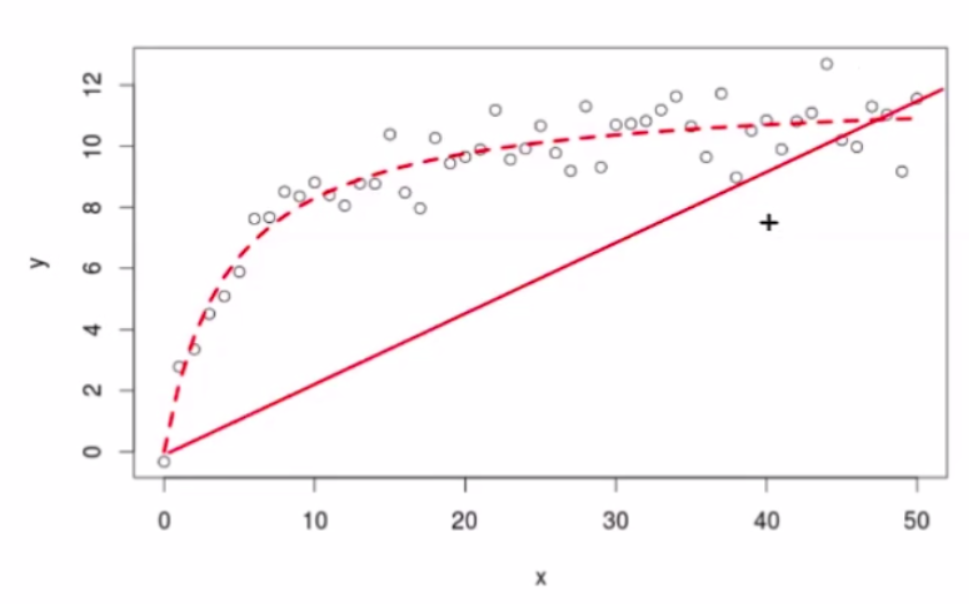

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

plt.rcParams["figure.figsize"] = (10,6)



In [2]:
data = np.array([[2,3,4]])
print(data)

[[2 3 4]]


In [3]:
trans = PolynomialFeatures(degree = 2, include_bias = False)

In [4]:
trans.fit(data)

PolynomialFeatures(include_bias=False)

In [5]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [6]:
trans.fit_transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

## Read Data

In [7]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Polynomial Converter (Polynomial çevirici)

In [8]:
X = df.drop("sales", axis =1)
y = df.sales

In [9]:
poly_conv = PolynomialFeatures(degree = 2, include_bias = False)

In [10]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [11]:
poly_features = poly_conv.transform(X)

In [13]:
poly_features.shape

(200, 9)

In [14]:
pd.DataFrame(poly_features, columns = ["TV","radio","newspaper","TV^2","TV&radio","TV&newspaper","radio^2","radio&newspaper","newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&radio,TV&newspaper,radio^2,radio&newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [16]:
X.shape

(200, 3)

## Train | Test Split

In [17]:
# from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state=101 )

## Model Fit

In [ ]:
# pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", "TV&Newspaper", "Radio^2", "Radio&Newspaper","Newspaper^2" ]).head()

In [15]:
# from sklearn.linear_model import LinearRegression

In [19]:
model_poly = LinearRegression()

In [20]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model_poly.predict(X_test)

In [23]:
my_dict = {"Actual" : y_test, "pred" : y_pred, "residual" : y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


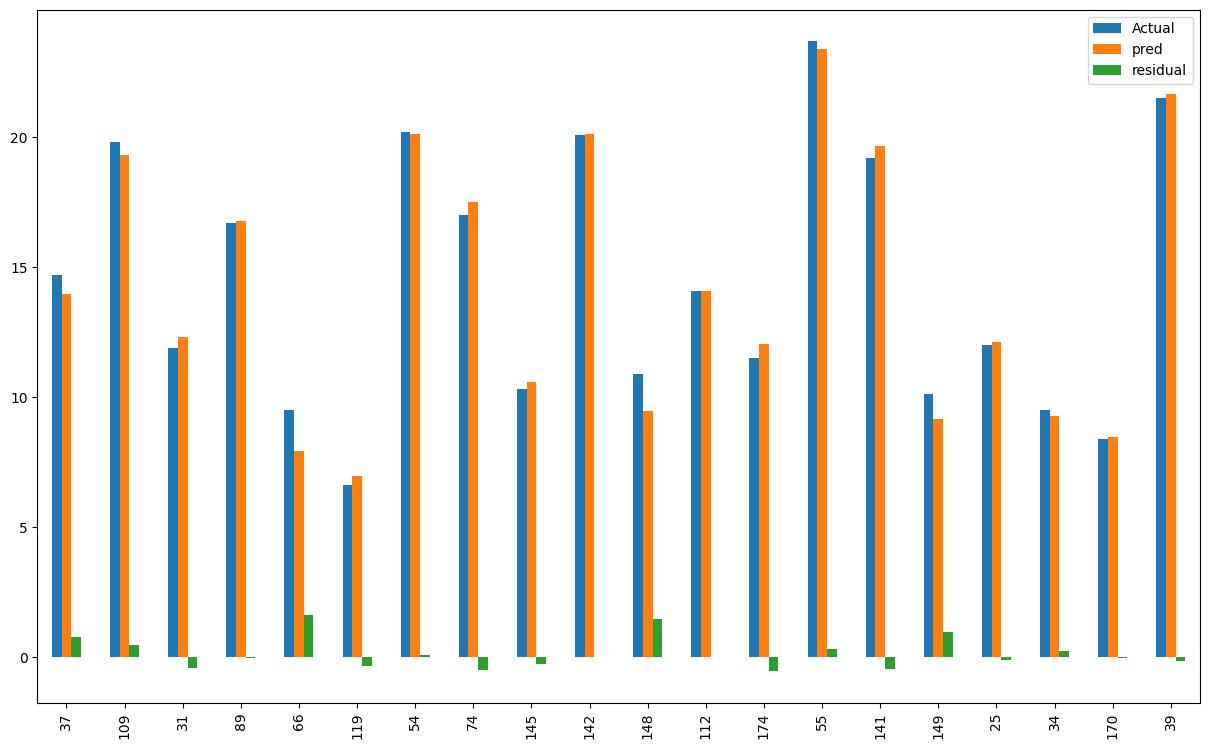

In [25]:
compare.head(20).plot(kind = "bar", figsize = (15,9));

# Poly Coefficients (Katsayilari)

In [26]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [29]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV","radio","newspaper","TV^2","TV&radio","TV&newspaper","radio^2","radio&newspaper","newspaper^2"],columns = ["coef"])

In [30]:
df_coef

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&radio,0.001142
TV&newspaper,-0.000052
radio^2,0.000033
radio&newspaper,0.000146
newspaper^2,-0.000030


In [ ]:
# Ilk satir

In [31]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.86190699])

# Evaluation on the Test Set

In [32]:
# from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [33]:
y_pred = model_poly.predict(X_test)

In [34]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}") 

In [35]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9843529333146795
MAE 		: 0.48967980448035886
MSE 		: 0.44175055104033895
RMSE 		: 0.6646431757269


In [36]:
y_train_pred = model_poly.predict(X_train)

In [37]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9868638137712757
MAE 		: 0.4049248139151435
MSE 		: 0.34569391424440005
RMSE 		: 0.5879574085292234


* Simple Linear Regression:
    * MAE      : 1.213
    * RMSE     : 1.516
    * r2_score : 0.8609
* Polynomial 2-degree:
    * MAE      : 0.48
    * RMSE     : 0.66
    * r2_score : 0.9868

# Let's Find Optimal Degree of Poly

In [38]:
def poly(d):
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
       
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features},
                        index=range(1,d))

In [39]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,1.734594,1.516152,3
2,0.587957,0.664643,9
3,0.433934,0.580329,19
4,0.351708,0.507774,34
5,0.250934,2.575819,55
6,0.195616,4.335186,83
7,5.421548,1379.529584,119
8,0.141370,4077.687648,164
9,0.171225,95268.780108,219
